# 알고리즘 체인과 파이프라인(Algorithm Chain and Pipeline)
* 3장에서 cancer 데이터셋을 MinMaxScaler로 전처리를 해서 커널 SVM의 성능을 크게 향상시켰었습니다.다음은 데이터를 분할하고 최솟값, 최댓값을 찾아 데이터의 스케일을 바꾸고 SVM을 훈련시키는 코드입니다.(improve performance of SVM with preprocessing by MinMaxScaler function)

In [4]:
from sklearn.svm import SVC
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# 데이터 적재와 분할
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0)
# 훈련 데이터의 최솟값, 최댓값을 계산합니다.
scaler = MinMaxScaler().fit(X_train)

# 훈련 데이터의 스케일을 조정합니다. 
X_train_scaled = scaler.transform(X_train)

svm = SVC()
# 스케일 조정된 훈련데이터에 SVM을 학습시킵니다.
svm.fit(X_train_scaled, y_train)
# 테스트 데이터의 스케일을 조정하고 점수를 계산합니다.
X_test_scaled = scaler.transform(X_test)
print("테스트 점수: {:.2f}".format(svm.score(X_test_scaled, y_test)))

테스트 점수: 0.97


## 데이터 전처리와 매개변수 선택
* GridSearchCV를 사용해서 더 좋은 SVC 매개변수를 찾으려고 합니다. 어떻게 해야 할까요?

In [6]:
from sklearn.model_selection import GridSearchCV
# 이 코드는 예를 위한 것입니다. 실제로 사용하지 마세요!!
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100],
              'gamma': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(SVC(), param_grid=param_grid, cv=5)
grid.fit(X_train_scaled, y_train)
print("최상의 교차 검증 정확도: {:.2f}".format(grid.best_score_))
print("테스트 점수: {:.2f}".format(grid.score(X_test_scaled, y_test)))
print("최적의 매개변수: ", grid.best_params_)

최상의 교차 검증 정확도: 0.98
테스트 점수: 0.97
최적의 매개변수:  {'C': 1, 'gamma': 1}


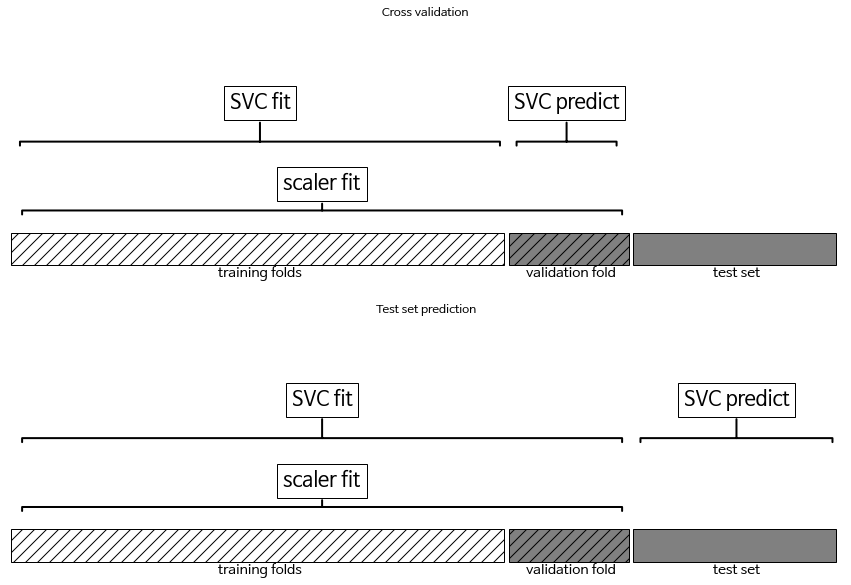

In [7]:
import mglearn
mglearn.plots.plot_improper_processing()

[교차 검증 반복 밖에서 전처리가 될 때 데이터 사용 형태] Data using form when preprocessing outside cross-validation iterations